# Effective Graph Paper
Code to generate "BreastCancer" figure 

In [1]:
import numpy as np
import graphviz
import cana
from cana.boolean_network import BooleanNetwork
from cana.datasets.bio import BREAST_CANCER
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, SVG
import networkx as nx
from copy import copy

In [2]:
def normalize(x, ab, db):
    return db[0] + (x - ab[0]) * (db[1] - db[0]) / (ab[1] - ab[0])

In [3]:
C = BREAST_CANCER()

In [5]:
SG = C.structural_graph()
EG = C.effective_graph(mode='input', bound='mean', threshold=-1)

In [6]:
# Print node names
for i,d in SG.nodes(data=True):
    print(i,d)

0 {'label': 'IGF1R_T'}
1 {'label': 'IGF1R'}
2 {'label': 'IGF1R_2'}
3 {'label': 'Fulvestrant'}
4 {'label': 'Alpelisib'}
5 {'label': 'Everolimus'}
6 {'label': 'Trametinib'}
7 {'label': 'Ipatasertib'}
8 {'label': 'Palbociclib'}
9 {'label': 'Neratinib'}
10 {'label': 'HER2'}
11 {'label': 'HER3_T'}
12 {'label': 'HER3'}
13 {'label': 'HER3_2'}
14 {'label': 'PDK1'}
15 {'label': 'mTORC2'}
16 {'label': 'SGK1_T'}
17 {'label': 'SGK1'}
18 {'label': 'PIM'}
19 {'label': 'HER2_3'}
20 {'label': 'HER2_3_2'}
21 {'label': 'RAS'}
22 {'label': 'RAS_2'}
23 {'label': 'RAS_3'}
24 {'label': 'MAPK'}
25 {'label': 'MAPK_2'}
26 {'label': 'PI3K'}
27 {'label': 'PI3K_2'}
28 {'label': 'PTEN'}
29 {'label': 'PIP3'}
30 {'label': 'PIP3_2'}
31 {'label': 'PDK1_pm'}
32 {'label': 'mTORC2_pm'}
33 {'label': 'AKT'}
34 {'label': 'p21_p27_T'}
35 {'label': 'p21_p27'}
36 {'label': 'cycE_CDK2_T'}
37 {'label': 'cycE_CDK2'}
38 {'label': 'KMT2D'}
39 {'label': 'TSC'}
40 {'label': 'PRAS40'}
41 {'label': 'mTORC1'}
42 {'label': 'FOXO3'}
43 {'

In [7]:
net_redundancy = 0
#
for nid, node in enumerate(C.nodes,start=0):
    net_redundancy += node.input_redundancy(mode='node', bound='upper', norm=False)
#
net_redundancy_norm = net_redundancy / C.Nnodes
#
print("Total Network Redundancy: {:.4} (norm: {:.4})".format(net_redundancy, net_redundancy_norm))

Total Network Redundancy: 128.1 (norm: 1.601)


In [15]:
dict_effconn = {nid: node.effective_connectivity(mode='node', bound='upper', norm=False) 
    for nid, node in enumerate(C.nodes, start=0) }
#
nx.set_node_attributes(EG, dict_effconn, 'effective_connectivity')

In [16]:
# Node Manual Positioning
idmap = {d['label']:i for i,d in SG.nodes(data=True)}
att = {}
apoptosis = '#b3dc66'
proliferation = '#bfbcd9'
drugs = '#d299ff'
ERsignaling = '#d3d3d3'
mTORC1path = '#ffb96c'
AKTpath = '#8fd3c4'
MAPKpath = '#ffffae'
PI3Kpath = '#7aa6cb'
RTKpath = '#f18568'

#Line 11
att['HER3_T'] = {'pos':'1,11', 'fillcolor': RTKpath}
att['HER3'] = {'pos':'2,11', 'fillcolor': RTKpath}
att['HER3_2'] = {'pos':'3,11', 'fillcolor': RTKpath}
att['IGF1R_T'] = {'pos':'4,11', 'fillcolor': RTKpath}
att['ESR1_2'] = {'pos':'8,11', 'fillcolor': ERsignaling}

# Line 10
att['Neratinib'] = {'pos':'0,10', 'fillcolor': drugs}
att['Alpelisib'] = {'pos':'6,10', 'fillcolor': drugs}
att['Fulvestrant'] = {'pos':'7,10', 'fillcolor': drugs}
att['HER2_3_2'] = {'pos':'1,10', 'fillcolor': RTKpath}
att['HER2_3'] = {'pos':'2,10', 'fillcolor': RTKpath}
att['HER2'] = {'pos':'3,10', 'fillcolor': RTKpath}
att['IGF1R'] = {'pos':'4,10', 'fillcolor': RTKpath}
att['IGF1R_2'] = {'pos':'3,10', 'fillcolor': RTKpath}
att['ESR1'] = {'pos':'8,10', 'fillcolor': ERsignaling}
att['FOXA1'] = {'pos':'9,10', 'fillcolor': ERsignaling}
att['PBX1'] = {'pos':'10,10', 'fillcolor': ERsignaling}
# Line 9
att['Trametinib'] = {'pos':'0,9', 'fillcolor': drugs}
att['PI3K'] = {'pos':'3,9', 'fillcolor': PI3Kpath}
att['PTEN'] = {'pos':'4,9', 'fillcolor': PI3Kpath}
att['Everolimus'] = {'pos':'6,9', 'fillcolor': drugs}
att['Ipatasertib'] = {'pos':'7,9', 'fillcolor': drugs}
att['ER'] = {'pos':'9,9', 'fillcolor': ERsignaling}

#Line 8
att['MAPK'] = {'pos':'0,8', 'fillcolor': MAPKpath}
att['PI3K_2'] = {'pos':'3,8', 'fillcolor': PI3Kpath}
att['PIP3'] = {'pos':'4,8', 'fillcolor': PI3Kpath}
att['PIP3_2'] = {'pos':'6,8', 'fillcolor': PI3Kpath}
att['ER_transcription'] = {'pos':'8,8', 'fillcolor': ERsignaling}
att['ER_transcription_2'] = {'pos':'9,8', 'fillcolor': ERsignaling}

# Line 7
att['MAPK_2'] = {'pos':'0,7', 'fillcolor': MAPKpath}
att['RAS'] = {'pos':'1,7', 'fillcolor': MAPKpath}
att['RAS_2'] = {'pos':'2,7', 'fillcolor': MAPKpath}
att['RAS_3'] = {'pos':'3,7', 'fillcolor': MAPKpath}
att['PDK1_pm'] = {'pos':'4,7', 'fillcolor': AKTpath}
att['mTORC2_pm'] = {'pos':'6,7', 'fillcolor': AKTpath}
att['KMT2D'] = {'pos':'7,7', 'fillcolor': ERsignaling}
att['MYC'] = {'pos':'8,7', 'fillcolor': ERsignaling}
att['MYC_2'] = {'pos':'9,7', 'fillcolor': ERsignaling}
# Line 6
att['PDK1'] = {'pos':'0,6', 'fillcolor': AKTpath}
att['mTORC2'] = {'pos':'1,6', 'fillcolor': AKTpath}
att['PIM'] = {'pos':'2,6', 'fillcolor': AKTpath}
att['AKT'] = {'pos':'5,6', 'fillcolor': AKTpath}
att['Palbociclib'] = {'pos':'9,6', 'fillcolor': drugs}
# Line 5
att['SGK1_T'] = {'pos':'0,5', 'fillcolor': AKTpath}
att['SGK1'] = {'pos':'1,5', 'fillcolor': AKTpath}
att['TSC'] = {'pos':'5,5', 'fillcolor': mTORC1path}
att['p21_p27'] = {'pos':'7,5', 'fillcolor': proliferation}
att['p21_p27_T'] = {'pos':'8,5', 'fillcolor': proliferation}
att['CDK46'] = {'pos':'9,5', 'fillcolor': proliferation}
att['cyclinD'] = {'pos':'10,5', 'fillcolor': proliferation}
# Line 4
att['FOXO3_Ub'] = {'pos':'0,4', 'fillcolor': AKTpath}
att['FOXO3'] = {'pos':'1,4', 'fillcolor': AKTpath}
att['cycE_CDK2'] = {'pos':'7,4', 'fillcolor': proliferation}
att['cycE_CDK2_T'] = {'pos':'8,4', 'fillcolor': proliferation}
att['PRAS40'] = {'pos':'4,4', 'fillcolor': mTORC1path}
att['mTORC1'] = {'pos':'5,4', 'fillcolor': mTORC1path}
att['cycD_CDK46'] = {'pos':'9,4', 'fillcolor': proliferation}
att['cycD_CDK46_2'] = {'pos':'10,4', 'fillcolor': proliferation}
# Line 3
att['BIM_T'] = {'pos':'0,3', 'fillcolor': apoptosis}
att['BCL2_T'] = {'pos':'2,3', 'fillcolor': apoptosis}
att['EIF4F'] = {'pos':'4,3', 'fillcolor': mTORC1path}
att['S6K'] = {'pos':'5,3', 'fillcolor': mTORC1path}
att['pRb'] = {'pos':'7,3', 'fillcolor': proliferation}
att['pRb_2'] = {'pos':'8,3', 'fillcolor': proliferation}
att['pRb_3'] = {'pos':'9,3', 'fillcolor': proliferation}
att['cyclinD_2'] = {'pos':'10,3', 'fillcolor': proliferation}
# Line 2
att['BIM'] = {'pos':'0,2', 'fillcolor': apoptosis}
att['BAD'] = {'pos':'1,2', 'fillcolor': apoptosis}
att['BCL2'] = {'pos':'2,2', 'fillcolor': apoptosis}
att['MCL1'] = {'pos':'4,2', 'fillcolor': apoptosis}
att['Translation'] = {'pos':'4,2', 'fillcolor': mTORC1path}
att['E2F'] = {'pos':'7,2', 'fillcolor': proliferation}
att['E2F_2'] = {'pos':'8,2', 'fillcolor': proliferation}
att['E2F_3'] = {'pos':'9,2', 'fillcolor': proliferation}
# Line 1
att['Apoptosis'] = {'pos':'0,1', 'fillcolor': apoptosis, 'width':'0.9'}
att['Apoptosis_2'] = {'pos':'1,1', 'fillcolor': apoptosis, 'width':'0.9'}
att['Apoptosis_3'] = {'pos':'2,1', 'fillcolor': apoptosis, 'width':'1'}
att['Proliferation'] = {'pos':'6,1', 'fillcolor': proliferation, 'width':'0.9'}
att['Proliferation_2'] = {'pos':'7,1', 'fillcolor': proliferation, 'width':'0.9'}
att['Proliferation_3'] = {'pos':'8,1', 'fillcolor': proliferation, 'width':'0.9'}
att['Proliferation_4'] = {'pos':'9,1', 'fillcolor': proliferation, 'width':'0.9'}

# Inverse Map
att = {idmap[k]:v for k,v in att.items()}

## Structural Graph

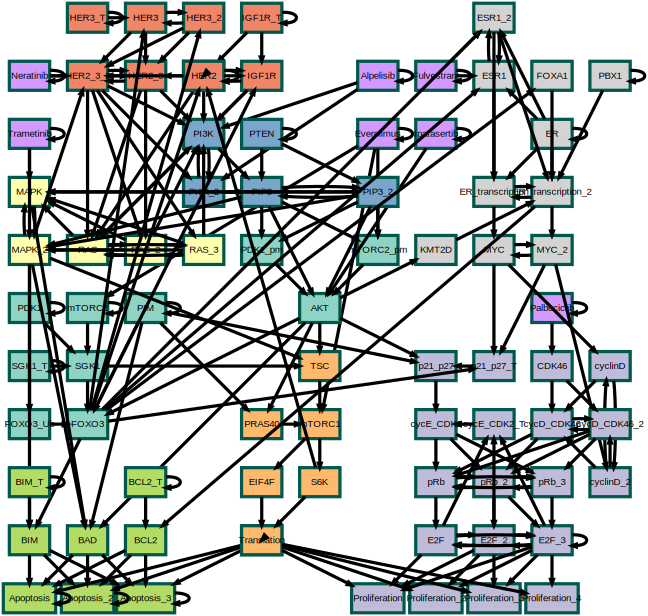

'BreastCancer-SG.svg'

In [17]:
pSG = graphviz.Digraph(name='Structural Graph', engine='neato')
pSG.attr('graph', size='9,9', concentrate='false', simplify='false', overlap='true',splines='false',ratio='auto')
pSG.attr('node', pin='true', shape='circle', fixedsize='true', color='#00594c', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
pSG.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid,SGatt in SG.nodes(data=True):
    label = SGatt['label']
    if nid in att:
        pos = att[nid].get('pos', '')
        shape = att[nid].get('shape', 'box')
        fillcolor = att[nid].get('fillcolor', '')
        width = att[nid].get('width', '.70')
        pSG.node(str(nid), label=label, pos=pos, shape=shape, fillcolor=fillcolor, width=width)

max_penwidth = 4
for uid,vid,d in SG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '%d' % (d['weight']*100)
    pSG.edge(uid, vid, weight=weight)
    
display(SVG(pSG.pipe(format='svg')),metadata={'isolated':True})
# Export
pSG._format = 'svg'
pSG.render("BreastCancer-SG", cleanup=True)

## Effective Graph

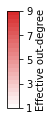

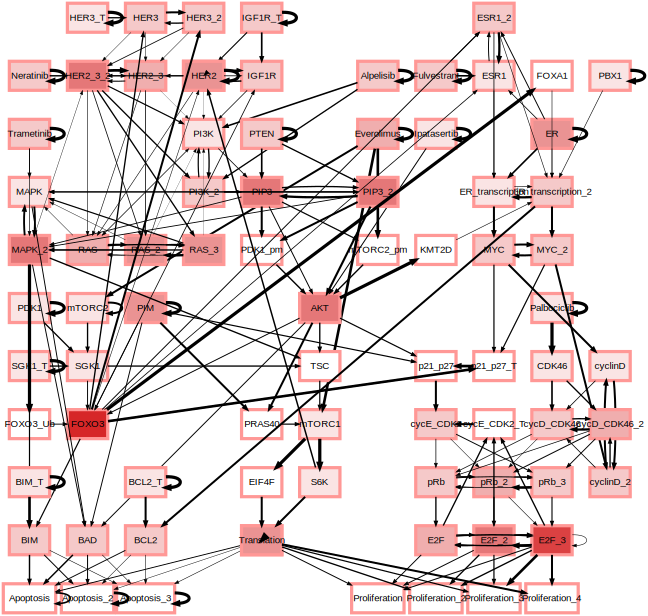

'BreastCancer-EG.svg'

In [19]:
pEG = graphviz.Digraph(name='Structural Graph', engine='neato')
pEG.attr('graph', size='9,9', concentrate='false', simplify='false', overlap='true',splines='false',ratio='auto')
pEG.attr('node', pin='true', shape='box', fixedsize='true', color='#ff9896', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
pEG.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

max_effoutdegree = max([v for n,v in EG.out_degree()])
list_effconn = [d['effective_connectivity'] for n,d in EG.nodes(data=True)]
min_effconn, max_effconn = min(list_effconn), max(list_effconn)
#
# ColorBar
interval = np.linspace(0.0, 0.70, 256)
colors = ['white','#d62728']
cmap = LinearSegmentedColormap.from_list('custom', colors)
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
norm = mpl.colors.Normalize(vmin=1, vmax=max_effoutdegree)
# Plot Colorbar
fig = plt.figure(figsize=(1.5,1.5))
ax = fig.add_axes([0.1, 0.05, 0.11, 0.9])
bounds = [1,3,5,7,9]
boundaries = np.linspace(1,max_effoutdegree,25).tolist()
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, boundaries=boundaries,
                               ticks=bounds,spacing='uniform', orientation='vertical', format='%.0f')
cb.set_label('Effective out-degree')
display(fig)
plt.savefig('Thaliana-colorbar.svg', transparent=True)
plt.close()
#
for nid,d in EG.nodes(data=True):
    label = d['label']
    pos = att[nid].get('pos', '')
    #width = '{:.2f}'.format( normalize(d['effective_connectivity'], (min_effconn,max_effconn),(0.50,0.80) ) )
    #att[nid]['width'] = width
    shape = att[nid].get('shape')
    width = att[nid].get('width','.70')
    # fillcolor
    rgb = cmap(norm(EG.out_degree(nid)))
    hex = mpl.colors.rgb2hex(rgb)
    #att[nid]['fillcolor'] = hex
    pEG.node(str(nid), label=label, pos=pos, shape=shape, fillcolor=hex, width=width)

max_penwidth = 4
for uid,vid,d in EG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '%d' % (d['weight']*100)
    penwidth = '%.2f' % ( d['weight']*max_penwidth )
    if d['weight'] > 0:
        rgb = cmap(d['weight'])
        hex = mpl.colors.rgb2hex(rgb)
        pEG.edge(uid,vid, weight=weight, penwidth=penwidth)
    else:
        pEG.edge(uid,vid, style='dashed', color='#A90533')
    
display(SVG(pEG.pipe(format='svg')),metadata={'isolated':True})
# Export
pEG._format = 'svg'
pEG.render("BreastCancer-EG", cleanup=True)

In [12]:
EGt1 = EG.copy()
threshold = 0.40
EGt1.remove_edges_from( [(u,v) for u,v,d in EGt1.edges(data=True) if d['weight']<threshold] )

pEGt1 = graphviz.Digraph(name='Structural Graph', engine='neato')
pEGt1.attr('graph', size='9,9', concentrate='false', simplify='false', overlap='true',splines='false',ratio='auto')
pEGt1.attr('node', pin='true', shape='circle', fixedsize='true', color='#00594c', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
pEGt1.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

max_effoutdegree = max([v for n,v in EGt1.out_degree()])
list_effconn = [d['effective_connectivity'] for n,d in EGt1.nodes(data=True)]
min_effconn, max_effconn = min(list_effconn), max(list_effconn)
#
norm = mpl.colors.Normalize(vmin=1, vmax=max_effoutdegree)
for nid,d in EGt1.nodes(data=True):
    label = d['label']
    pos = att[nid].get('pos','')
    shape = att[nid].get('shape')
    width = att[nid].get('width','.70')
    # fillcolor
    rgb = cmap(norm(EG.out_degree(nid)))
    hex = mpl.colors.rgb2hex(rgb)
    pEGt1.node(str(nid), label=label, pos=pos, shape=shape, fillcolor=hex, width=width)

max_penwidth = 4
for uid,vid,d in EGt1.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '%d' % (d['weight']*100)
    penwidth = '%.2f' % ( d['weight']*max_penwidth )
    rgb = cmap(d['weight'])
    hex = mpl.colors.rgb2hex(rgb)
    pEGt1.edge(uid,vid, weight=weight, penwidth=penwidth, color='black')
    
display(SVG(pEGt1.pipe(format='svg')),metadata={'isolated':True})
# Export
pEGt1._format = 'svg'
efile = u"BreastCancer-EG-t{t:s}".format(t=str(threshold).replace('.','-') )
pEGt1.render(efile, cleanup=True)

KeyError: 'effective_connectivity'